In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

In [2]:
# %   COURSE: Neural signal processing and analysis: Zero to hero
# %  SESSION: Problem set: Simulating and visualizing data
# %  TEACHER: Mike X Cohen, sincxpress.com

In [3]:
# %%% INSTRUCTIONS:
# % The goal of this assignment is to simulate time series data
# % that can be used to test time-series analysis methods.
# % For each section below: 
# %   1) Complete the MATLAB code
# %   2) Put the data into the EEG structure
# %      - Make sure all relevant fields are accurate (EEG.data, EEG.pnts, EEG.trials, EEG.srate, EEG.nbchan, EEG.times)
# %   3) Plot the data using the function plot_simEEG()

# % NOTE 1: Obviously, you need to fill in missing code.
# % NOTE 2: Be careful, because sometimes there is incorrect code that doesn't produce coding errors.
# %         Remember: Visualize, and visualize often.

In [131]:
def plot_EEG(eeg_dict, signal_name, channel_n=0):
    
    hz = np.linspace(0, eeg_dict['srate'], eeg_dict['pnts'])
    pw = np.mean(2*np.abs(np.fft.fft(eeg_dict[signal_name][channel_n, :, :])/eeg_dict['pnts'])**2, 1)
    
    plt.figure(figsize=(14,10))
    
    plt.subplot(2,1,1)
    for trial in range(eeg_dict['trials']):
        plt.plot(
            eeg_dict['times'], 
            eeg_dict[signal_name][channel_n, :, trial], 
            color='black',
            linewidth=0.5,
            alpha=0.1)
    plt.plot(
        eeg_dict['times'], 
        eeg_dict[signal_name][channel_n, :, :].mean(1),
        color='black',
        linewidth=1)
    plt.title(f'ERP for {channel_n+1} channel')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    
    plt.subplot(2,2,3)
    plt.plot(hz, pw)
    plt.xlim([0,40])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.title('Power Spectrum')
    
    plt.show()

In [132]:
srate = 512
EEG = {'srate': srate, # sampling rate in Hz
       'pnts': srate*2,
       'trials': 10,
       'nbchan': 64}

In [133]:
# % time vector
EEG['times'] = np.arange(0, EEG['pnts'])/EEG['srate']

In [134]:
# %% 1) white noise

# % The goal of this exercise is to gain basic familiarity with data simulations.
# % You will create a dataset of white noise and plot it.

# % specify EEG parameters

In [139]:
# % create data as white noise
EEG['data_normal'] = np.random.normal(
    size=(EEG['nbchan'], EEG['pnts'], EEG['trials']))

EEG['data_uniform'] = np.random.random(
    size=(EEG['nbchan'], EEG['pnts'], EEG['trials'])) - .5

In [140]:
# % the function below takes at least one argument (EEG),
# % and optionally a second argument (channel number),
# % and optionally a third argument (figure number)
# plot_simEEG(EEG,2,3)

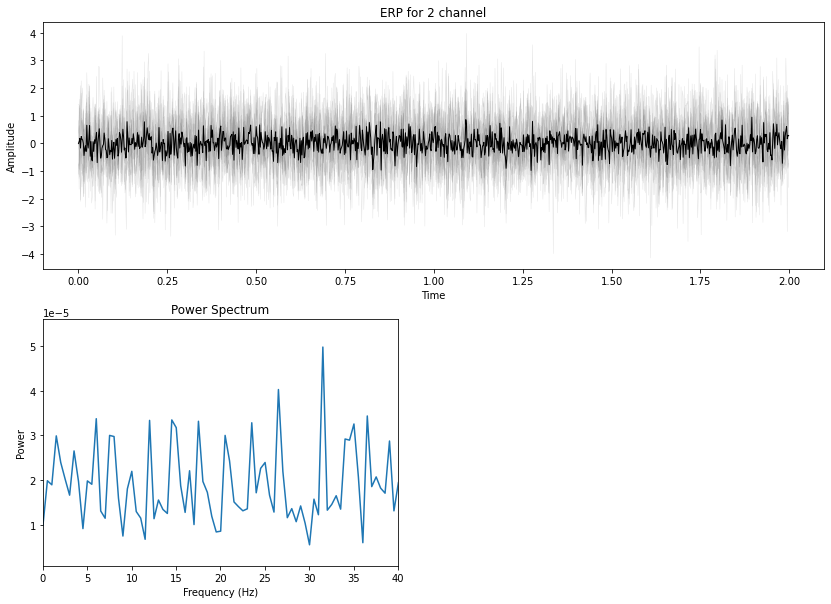

In [141]:
# white noise
plot_EEG(eeg_dict=EEG,
         signal_name='data_normal',
         channel_n=1)

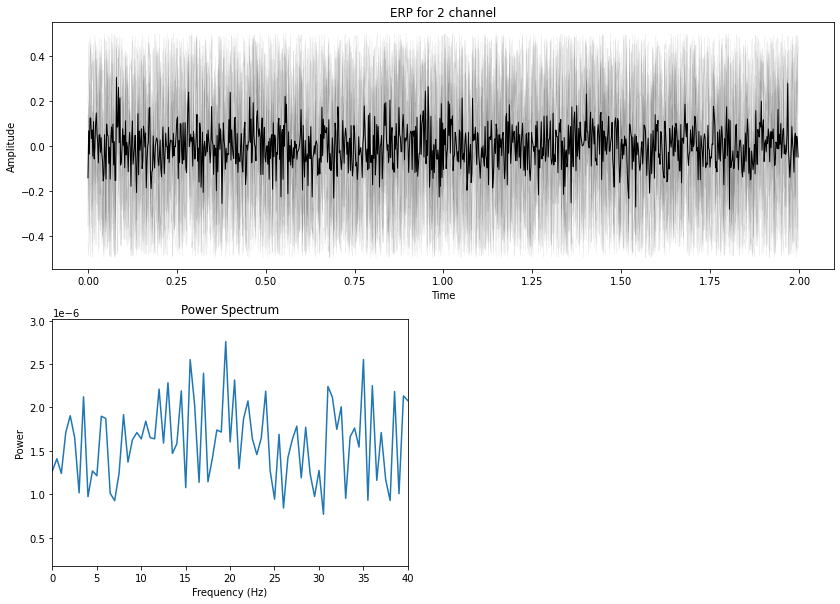

In [142]:
# uniform noise
plot_EEG(eeg_dict=EEG,
         signal_name='data_uniform',
         channel_n=1)

In [143]:
# %%% Question: What is the effect of noise amplitude on the 
# %             resulting graphs?
# % 
# %%% Question: Do the results change if you use normally distributed
# %             vs. uniformly distributed noise?
# % 
# %%% Question: Are the results different for different channels? Why or why not?

In [148]:
# %% 2) pink noise

# % The goal of this exercise is to extend the previous exercise to "pink" noise.
# % You should create the noise separately on each trial

# % feel free to change some parameters compared to above...
# EEG.nbchan = 4 

# % the key parameter of pink noise is the exponential decay (ed)
ed = 50 # % try different values!

# % initialize EEG data as a zeros matrix
EEG['data_pink'] = np.zeros(shape=(EEG['nbchan'], EEG['pnts'], EEG['trials']))

In [163]:
for chan in range(EEG['nbchan']):
    for trial in range(EEG['trials']):
        ampl_spectrum = np.random.random(size=(EEG['pnts'])) * np.exp(-(np.arange(EEG['pnts'])/ed))
        
        fc = ampl_spectrum * np.exp(complex(0,1)*2* np.pi * np.random.random(size=ampl_spectrum.shape))
        
        EEG['data_pink'][chan,:,trial] = np.fft.ifft(fc).real

In [14]:
# for chani=1:EEG.nbchan
#     for triali=1:EEG.trials
        
#         %%% Note about the code below: This involves creating the signal first in the frequency domain, 
#         %   then transforming it into the time domain. Don't worry if you don't understand the details
#         %   (you'll learn them tomorrow!); try to plot each step to get a basic idea.
        
#         % generate one-sided 1/f amplitude spectrum
#         as = rand(1,EEG.pnts) .* exp(-(0:EEG.pnts-1)/ed);
        
#         % Fourier coefficients as amplitudes times random phases
#         fc = as .* exp(1i*2*pi*rand(size(as)));
        
#         % inverse Fourier transform to create the noise
#         EEG.data(chani,:,triali) = real(ifft(fc));
#     end
# end

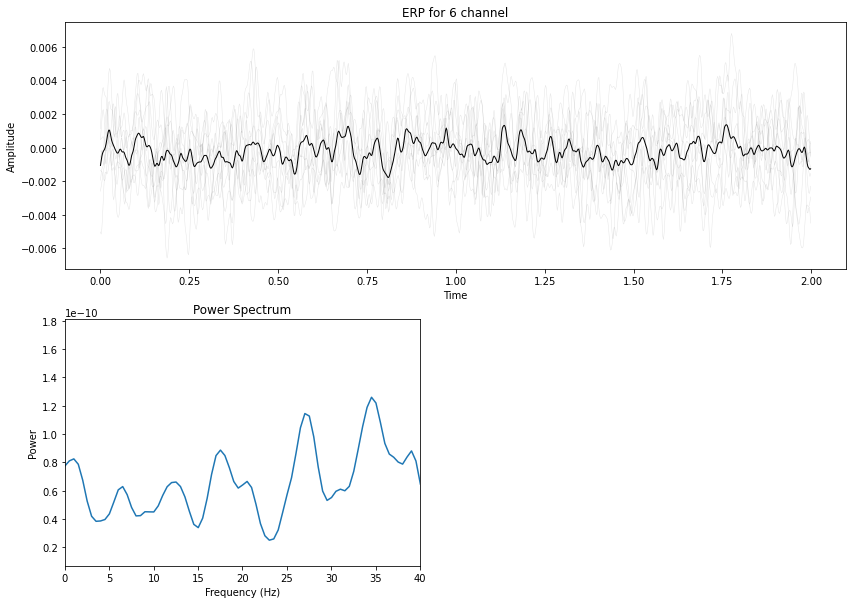

In [168]:
# pink noise
plot_EEG(eeg_dict=EEG,
         signal_name='data_pink',
         channel_n=5)

In [16]:
# %%% Question: Which looks more like real EEG data: white or pink noise?
# %             Why do you think this is?
# % 
# %%% Question: Which values of variable 'ed' make the data look most like real EEG data?

In [17]:
# %% 3) Ongoing stationary

# % The goal here is to create a dataset with ongoing sinewaves.
# % There should be multiple sine waves simultaneously in each channel/trial.

In [18]:
# % list of frequencies and corresponding amplitudes
frex = [3, 5, 16] # in Hz
amps = [3, 4, 5] # in arbitrary units

In [19]:
EEG['data_sine'] = np.zeros(shape=(EEG['nbchan'], EEG['pnts'], EEG['trials']))

In [20]:
for chan in range(EEG['nbchan']):
    for trial in range(EEG['trials']):
#         %%% Note that here the signal is created in the time domain, unlike in the previous example.
#         %   Some signals are easier to create in the time domain; others in the frequency domain.
        
#         % create a multicomponent sine wave

        sinewave = np.zeros(shape=(EEG['pnts'], ))
    
        for si in np.arange(len(frex)):
            sinewave = sinewave + amps[si]*np.sin(2*np.pi*frex[si]*EEG['times'])
        EEG['data_sine'][chan,:,trial] = sinewave + np.random.random(size=sinewave.shape)

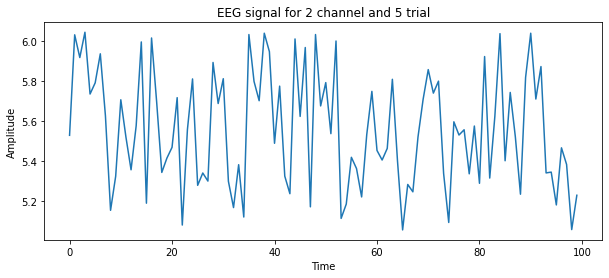

In [21]:
# Ongoing stationary
plot_EEG(eeg_data=EEG['data_sine'],
         channel_n=1,
         trial_n=4)

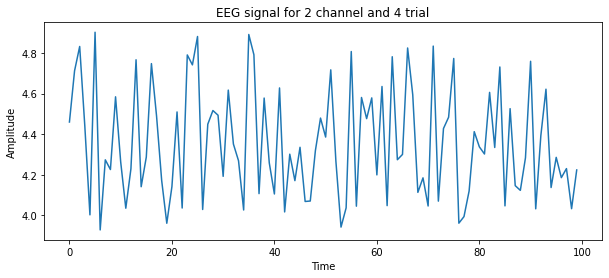

In [22]:
# Ongoing stationary
plot_EEG(eeg_data=EEG['data_sine'],
         channel_n=1,
         trial_n=3)

In [ ]:
# %%% Question: What can you change in the code above to make the EEG
# %             activity non-phase-locked over trials?
# %             
# %%% Question: Which of the plots look different for phase-locked vs. non-phase-locked?
# %             (Hint: plot them in different figures to facilitate comparison.)
# %             Are you surprised about the differences?
# %             
# %%% Question: Are all frequencies equally well represented in the 'static' and 'dynamic' power spectra?
# %             Can you change the parameters to make the spectral peaks more or less visible in the two plots?
# % 